In [10]:
from src.util import process_data, get_split_data
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
paths = os.listdir("data/Raw/")
paths = ["data/Raw/" + x for x in paths]

In [12]:
columns_to_normalize = ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 
                        'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 
                        'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 
                        'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 
                        'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Length', 'Bwd Header Length', 
                        'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 
                        'Packet Length Variance', 'Down/Up Ratio', 'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 
                        'Fwd Header Length.1', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 
                        'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward', 'Active Mean', 'Active Std', 
                        'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']

In [ ]:
df = process_data(paths, columns_to_normalize)

Completed:data/Raw/Monday-WorkingHours.pcap_ISCX.csv


In [ ]:
df.columns

Index(['Source IP', 'Source Port', 'Destination IP', 'Destination Port',
       'Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std'

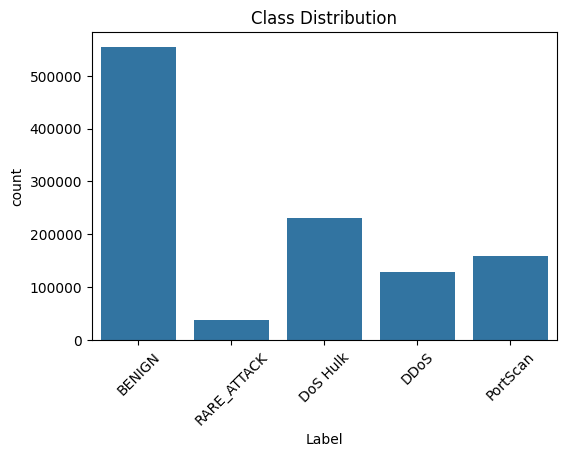

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Label', data=df)
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

In [ ]:
attack_counts = df['Label'].value_counts()
attack_counts

Label
BENIGN         554990
DoS Hulk       230124
PortScan       158804
DDoS           128025
RARE_ATTACK     37376
Name: count, dtype: int64

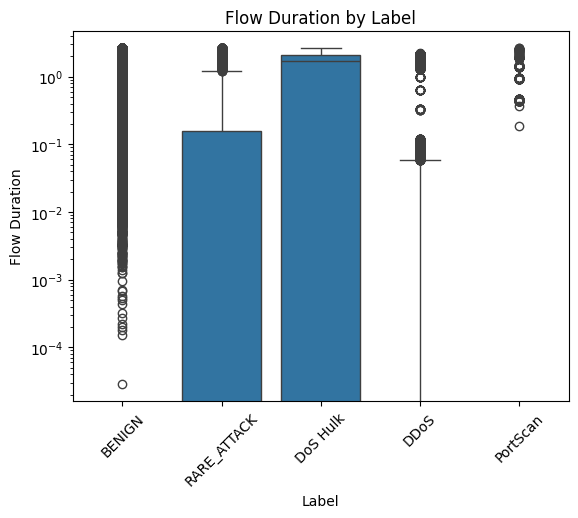

In [ ]:
sns.boxplot(x='Label', y='Flow Duration', data=df)
plt.yscale('log')  # often long-tailed
plt.title('Flow Duration by Label')
plt.xticks(rotation=45)
plt.show()

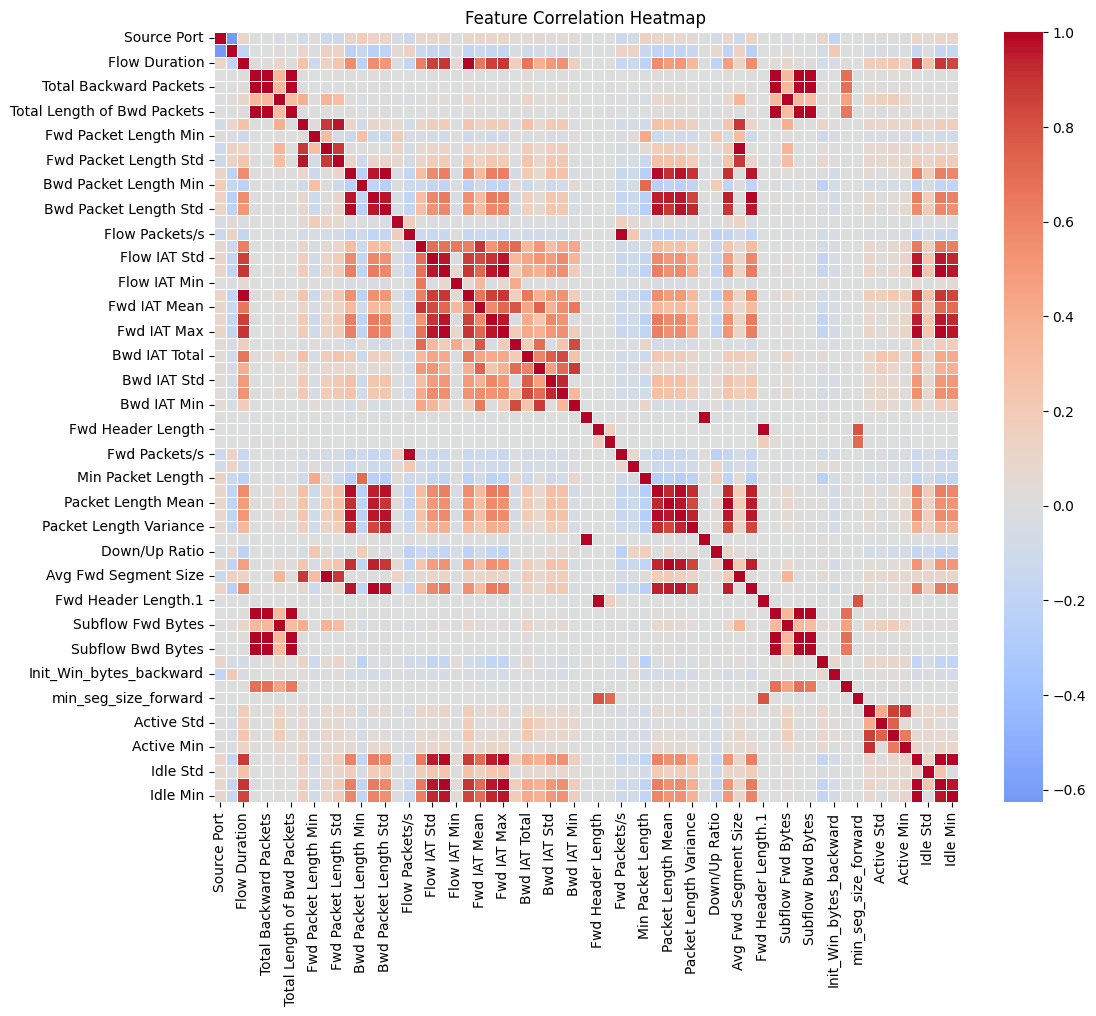

In [ ]:
numeric_cols = df.select_dtypes(include='number').drop(columns=['Label'], errors='ignore')
corr = numeric_cols.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [1]:
%reset -f

In [2]:
from src.util import get_split_data
import os

In [3]:
paths = os.listdir("data/Raw/")
paths = ["data/Raw/" + x for x in paths]

In [4]:
columns_to_normalize = ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
                        'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max',
                        'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean',
                        'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
                        'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Length', 'Bwd Header Length',
                        'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std',
                        'Packet Length Variance', 'Down/Up Ratio', 'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size',
                        'Fwd Header Length.1', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes',
                        'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward', 'Active Mean', 'Active Std',
                        'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']

In [5]:
X, y = get_split_data(paths, columns_to_normalize)

Completed:data/Raw/Monday-WorkingHours.pcap_ISCX.csv
Completed:data/Raw/Wednesday-workingHours.pcap_ISCX.csv
Completed:data/Raw/Tuesday-WorkingHours.pcap_ISCX.csv
Completed:data/Raw/Friday-WorkingHours-Morning.pcap_ISCX.csv
Completed:data/Raw/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Completed:data/Raw/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Completed:data/Raw/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv


/home/mayur/Code/Graph_Based_Intrusion_Detection_System/src/util/Process.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label_col] = df[label_col].apply(lambda x: 'RARE_ATTACK' if x in rare_labels else x)


In [6]:
import pandas as pd

In [7]:
"""X = pd.DataFrame(X)"""

'X = pd.DataFrame(X)'

In [8]:
X.to_csv('data/Processed_and_split/Processed_X.csv')

In [9]:
y.to_csv('data/Processed_and_split/Processed_y.csv')

In [2]:
import polars as pl

In [3]:
X = pl.read_csv("data/Processed_and_split/Processed_X.csv")

In [4]:
y = pl.read_csv("data/Processed_and_split/Processed_y.csv")

In [5]:
import ipaddress


def ip_to_int(ip):
    return int(ipaddress.ip_address(ip))

In [7]:
X_pd = X.to_pandas()

X_pd['Source IP'] = X_pd['Source IP'].apply(ip_to_int)
X_pd['Destination IP'] = X_pd['Destination IP'].apply(ip_to_int)

X = pl.from_pandas(X_pd)

In [8]:
X.write_parquet("data/Processed_and_split/Processed_X.parquet")

In [9]:
y.write_parquet("data/Processed_and_split/Processed_y.parquet")